<a href="https://colab.research.google.com/github/Pavti7/DATA_Pawel_A/blob/main/Machine_Learning/Regresja/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/weatherHistory.csv')
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [ ]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']= df['Formatted Date'].dt.tz_convert('Europe/Warsaw')

In [ ]:
df.dtypes

Formatted Date              datetime64[ns, Europe/Warsaw]
Summary                                            object
Precip Type                                        object
Temperature (C)                                   float64
Apparent Temperature (C)                          float64
Humidity                                          float64
Wind Speed (km/h)                                 float64
Wind Bearing (degrees)                            float64
Visibility (km)                                   float64
Loud Cover                                        float64
Pressure (millibars)                              float64
Daily Summary                                      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36903 entries, 0 to 36902
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype                        
---  ------                    --------------  -----                        
 0   Formatted Date            36903 non-null  datetime64[ns, Europe/Warsaw]
 1   Summary                   36903 non-null  object                       
 2   Precip Type               36903 non-null  object                       
 3   Temperature (C)           36903 non-null  float64                      
 4   Apparent Temperature (C)  36903 non-null  float64                      
 5   Humidity                  36903 non-null  float64                      
 6   Wind Speed (km/h)         36903 non-null  float64                      
 7   Wind Bearing (degrees)    36903 non-null  float64                      
 8   Visibility (km)           36903 non-null  float64                      
 9   Loud Cover                36903 non-nul

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])
df['Summary'] = df['Summary'].astype('category')
le.fit(df['Precip Type'])
precip_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
df['Precip Type'] = le.fit_transform(df['Precip Type'])
df['Precip Type'] = df['Precip Type'].astype('category')
#precip_mapping = dict(zip(le.classes_, range(len(le.classes_))))
df['Daily Summary'] = le.fit_transform(df['Daily Summary'])
df['Daily Summary'] = df['Daily Summary'].astype('category')
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,15,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,129
1,2006-04-01 01:00:00+02:00,15,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,129
2,2006-04-01 02:00:00+02:00,13,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,129
3,2006-04-01 03:00:00+02:00,15,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,129
4,2006-04-01 04:00:00+02:00,13,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,129
5,2006-04-01 05:00:00+02:00,15,0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,129
6,2006-04-01 06:00:00+02:00,15,0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,129
7,2006-04-01 07:00:00+02:00,15,0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,129
8,2006-04-01 08:00:00+02:00,15,0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,129
9,2006-04-01 09:00:00+02:00,15,0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,129


In [ ]:
precip_mapping

{'rain': 0, 'snow': 1}

In [ ]:
df.dtypes

Formatted Date              datetime64[ns, Europe/Warsaw]
Summary                                          category
Precip Type                                      category
Temperature (C)                                   float64
Apparent Temperature (C)                          float64
Humidity                                          float64
Wind Speed (km/h)                                 float64
Wind Bearing (degrees)                            float64
Visibility (km)                                   float64
Loud Cover                                        float64
Pressure (millibars)                              float64
Daily Summary                                    category
dtype: object

In [ ]:
df.drop('Loud Cover', axis=1, inplace=True)

In [ ]:
df['Day'] = df['Formatted Date'].dt.day
df['Month'] = df['Formatted Date'].dt.month

In [ ]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Day,Month
0,2006-04-01 00:00:00+02:00,15,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,129,1,4
1,2006-04-01 01:00:00+02:00,15,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,129,1,4
2,2006-04-01 02:00:00+02:00,13,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,129,1,4
3,2006-04-01 03:00:00+02:00,15,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,129,1,4
4,2006-04-01 04:00:00+02:00,13,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,129,1,4
5,2006-04-01 05:00:00+02:00,15,0,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,129,1,4
6,2006-04-01 06:00:00+02:00,15,0,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,129,1,4
7,2006-04-01 07:00:00+02:00,15,0,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,129,1,4
8,2006-04-01 08:00:00+02:00,15,0,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,129,1,4
9,2006-04-01 09:00:00+02:00,15,0,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,129,1,4


In [ ]:
df.dtypes

Formatted Date              datetime64[ns, Europe/Warsaw]
Summary                                          category
Precip Type                                      category
Temperature (C)                                   float64
Apparent Temperature (C)                          float64
Humidity                                          float64
Wind Speed (km/h)                                 float64
Wind Bearing (degrees)                            float64
Visibility (km)                                   float64
Pressure (millibars)                              float64
Daily Summary                                    category
Day                                                 int64
Month                                               int64
dtype: object

In [ ]:
df.corr(numeric_only=False)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Day,Month
Formatted Date,1.000000,0.029810,-0.043706,0.074926,0.068812,-0.047981,0.036865,-0.027710,-0.010066,0.024391,0.004310,0.015604,0.245725
Summary,0.029810,1.000000,-0.116253,0.144634,0.140247,-0.139153,0.008615,0.027230,0.108692,0.096628,0.165880,-0.026425,-0.033265
Precip Type,-0.043706,-0.116253,1.000000,-0.570422,-0.571343,0.246661,-0.075844,-0.028536,-0.320638,0.039853,-0.237671,0.027972,-0.094899
Temperature (C),0.074926,0.144634,-0.570422,1.000000,0.992276,-0.654620,0.000017,0.011732,0.325870,-0.030999,0.408650,0.008454,0.126692
Apparent Temperature (C),0.068812,0.140247,-0.571343,0.992276,1.000000,-0.623505,-0.070160,0.006311,0.315860,-0.029376,0.404699,0.010040,0.131020
Humidity,-0.047981,-0.139153,0.246661,-0.654620,-0.623505,1.000000,-0.225917,0.013227,-0.289439,0.001415,-0.339384,-0.032472,0.058340
Wind Speed (km/h),0.036865,0.008615,-0.075844,0.000017,-0.070160,-0.225917,1.000000,0.114627,0.110942,-0.041283,-0.003355,-0.010674,-0.066014
Wind Bearing (degrees),-0.027710,0.027230,-0.028536,0.011732,0.006311,0.013227,0.114627,1.000000,0.054217,-0.009561,0.049548,-0.012633,-0.028887
Visibility (km),-0.010066,0.108692,-0.320638,0.325870,0.315860,-0.289439,0.110942,0.054217,1.000000,0.023729,0.425045,0.015686,-0.092533
Pressure (millibars),0.024391,0.096628,0.039853,-0.030999,-0.029376,0.001415,-0.041283,-0.009561,0.023729,1.000000,0.025422,-0.019369,-0.034653


#MODEL


In [ ]:
X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']

In [ ]:
X.head(10)

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
5,9.222222,0.85
6,7.733333,0.95
7,8.772222,0.89
8,10.822222,0.82
9,13.772222,0.72


In [ ]:
y.head(10)

0     7.388889
1     7.227778
2     9.377778
3     5.944444
4     6.977778
5     7.111111
6     5.522222
7     6.527778
8    10.822222
9    13.772222
Name: Apparent Temperature (C), dtype: float64

In [ ]:
print(X.shape)
print(y.shape)

(36903, 2)
(36903,)


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X)
y_pred

array([8.43776765, 8.22907131, 8.32974841, ..., 7.43382412, 7.55991752,
       7.53417187])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print(f'R2 score: {r2_score(y, y_pred)}')
print(f'MAE: {mean_absolute_error(y, y_pred)}')
print(f'MSE: {mean_squared_error(y, y_pred)}')
print(f'RMSE: {mean_squared_error(y, y_pred, squared=False)}')

R2 score: 0.9857993308019134
MAE: 0.9668602522796043
MSE: 1.6122171300999029
RMSE: 1.269731125120552


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

R2 score: 0.9859589571809945
MAE: 0.9625537204042076
MSE: 1.6105793367878851
RMSE: 1.2690860241874407


In [ ]:
a = linreg.intercept_
b = linreg.coef_
print(a, b)

-4.6025053551477715 [1.1434604  2.47940609]


In [ ]:
def get_ambient_temp(temp, hum):
  a = -4.6025053551477715
  b = 1.1434604, 2.47940609
  try:
    return a + np.dot([temp, hum], np.array(b).T)
  except:
    print('Blad')  

In [ ]:
get_ambient_temp(20, 0.5)

19.50640568985223

In [ ]:
print(f'R2 score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

R2 score: 0.9859589571809945
MAE: 0.9625537204042076
MSE: 1.6105793367878851
RMSE: 1.2690860241874407


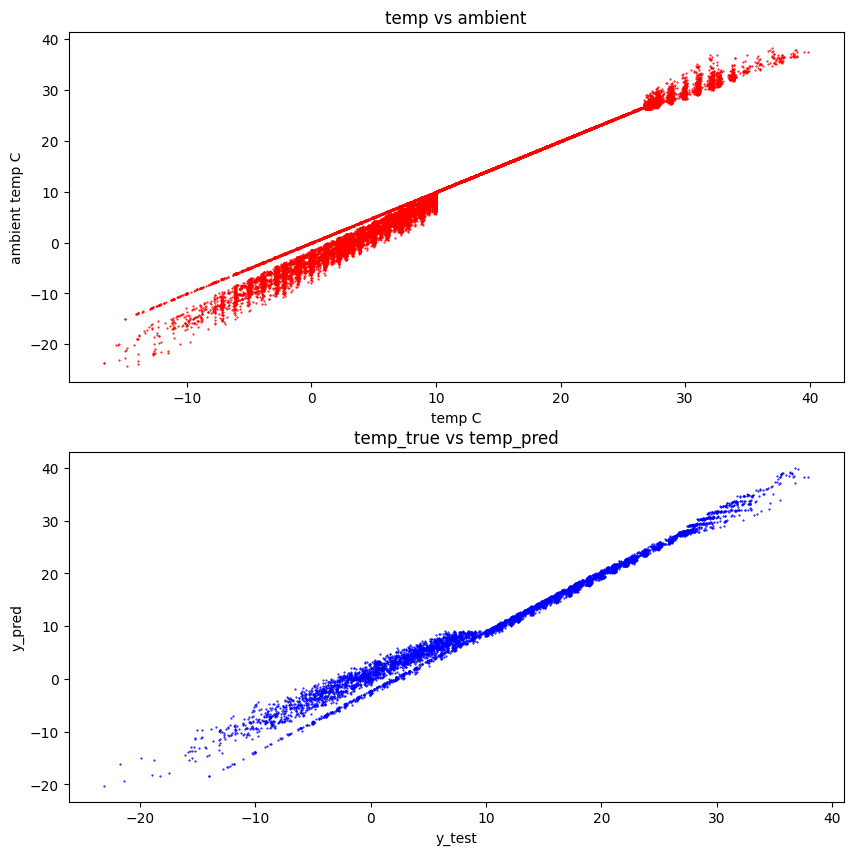

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].plot(X['Temperature (C)'], y, 'o', color='red',  markersize=0.5)
ax[0].set_title('temp vs ambient')
ax[0].set_xlabel('temp C')
ax[0].set_ylabel('ambient temp C')
ax[1].plot(y_test, y_pred, 'o', color='blue',  markersize=0.5)
ax[1].set_title('temp_true vs temp_pred')
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('y_pred')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

<Axes: >

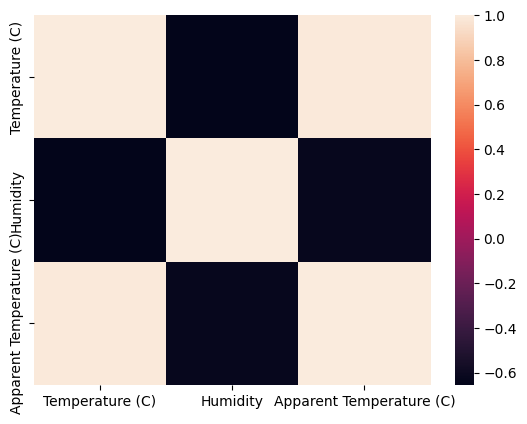

In [ ]:
import seaborn as sns
corr = pd.concat((X,y), axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)